In [8]:
using DataFramesMeta

include("src/Spectrum.jl")
include("src/ModeSolutions.jl")

view_field (generic function with 1 method)

In [15]:
lambda = [2500, 3000] # 扫谱波长范围 nm
mode = "TE" # 电磁场模式
R = 50 # WGM 半径
n = 1.2 # 折射率
n_num_max = 1 # 径向阶数

# 扫谱
data = spectrum(lambda, mode, n_num_max, n, R, Q_factor="open");

Finished ✓      100%|███████████████████████████████████| Time: 0:01:32


In [20]:
# 扫谱结果存入文件
CSV.write("/Users/wenzhengliu/Research/temp_data/radius=$R refractive_id=$n wavelength=$lambda'nm' n_max=$n_num mode=$mode.csv", data)

"/Users/wenzhengliu/Research/temp_data/radius=50 refractive_id=1.5 wavelength=[700, 800]'nm' n_max=4 mode=TE.csv"

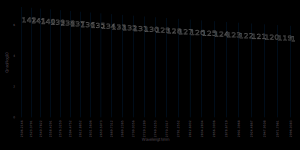

In [16]:
# 显示谱线结果
view_spectrum(lambda, data, 1, view_mode="details")

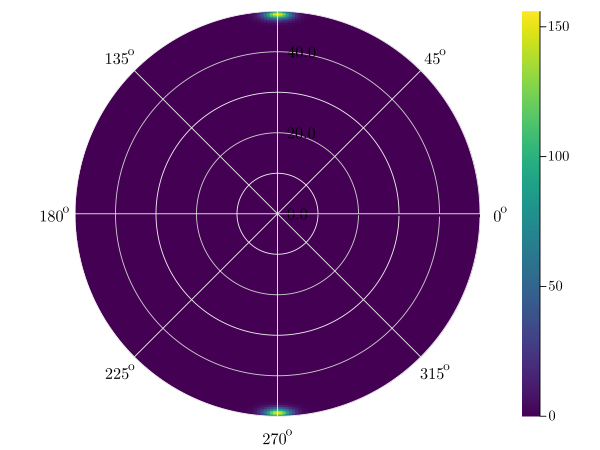

1523.6395461991756


In [13]:
# 作图，给定模式数
n_num, l_num, m_num = 1, 440, 440

lambda_df = @linq data |> 
            where(:n .== n_num, :l .== l_num) |>
            select(:wav = :wavelength)
lambda_select = lambda_df.wav[1]
println(lambda_select)

view_field(lambda_select, n_num, l_num, m_num, n, R, mode, "nE_theta", scale="normal")